# ALY6040 Assignment - Milestone 2, Alpha group project
* EDA of Cerebral Stroke dataset.
* Date: 17 March 2024
* Created by:Alejandro Gerov Armas,Junaid Iftikhar, Mala Chaurasia, Rohan Vinodbhai Kasodariya
* Instructor: Professor Justin Grosz
* CPS, Northeastern University,Boston MA

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
# Numerical scaling using MinMax scalar
from sklearn.preprocessing import MinMaxScaler

# # Scikit learn libraries for decision tree and metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime


import warnings
warnings.filterwarnings('ignore')

In [26]:
source=pd.read_csv('/Users/rohankasodariya/Downloads/dataset-2.csv')

In [27]:
source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [28]:
source.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [29]:
print("Unique user IDs:", len(source.id.unique()))

Unique user IDs: 43400


### Observations:

* 43400 samples, 12 features
* Missing values: 1462 values missing for BMI, 13292 for smoking_status
* Data type Int64: id, hypertension, heart disease, stroke are int64, need to be converted to categorical types, binary.
* Data type float64: age, avg_glucose_level, bmi
* Data Type object: ever_married, work_type, Residence_type, smoking_status


In [6]:
source.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


### Observations

* **age**: Mean 42.21, Standard deviation: 22.51. 5 point stats: min=0.08, 25 percentile = 24.0, median = 44, 75 percentile =60, max = 82.
* **avg_glucose_level**: mean: 104.48, standard deviation: 43.111, 5 point stats: min=55.00, 25 percentile= 77.54, median= 91.58, 75 percentile = 112.07, max= 291.05
* **bmi**: mean: 28.60, standard deviation: 7.77, 5 point stats: min=10.10, 25 percentile=23.20, mediam=27, 75 percentile=32, max=97.6

In [7]:
source.describe(include=['object', 'category'])

,gender,ever_married,work_type,Residence_type,smoking_status
count,43400,43400,43400,43400,30108
unique,3,2,5,2,3
top,Female,Yes,Private,Urban,never smoked
freq,25665,27938,24834,21756,16053


### Observations

* gender: 3 unique values, Mode = Female with 25665 frequency.
* hypertension : 2 unique values, mode =0 with 39339 frequencey.
* heart_disease: 2 unique values, mode= 0 with 41338 frequency.
* ever_married: 2 unique values, mode= yes with 27938 frequency.
* work_type: 5 unique values, mode= Private with 24834 frequency.
* residence_type: 2 unique values, mode=Urban with 21756 frequency.
* smoking_status: 3 unique values, mode= never smoked with 16053 frequency.
* Stroke: The target variable, imbalanced dataset, binary, mode=0, frequency=42617.


# Data Prep

In [30]:
#Identifying fitness of the datasett and missing values per column
#Two columns need to be cleaned: BMI with 3% of missing data and smoking_status with 30%
df = source.copy()

missing_values_count = df.isnull().sum()

total_rows = len(df)
missing_values_percentage = (missing_values_count / total_rows) * 100

missing_values_df = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Percentage (%)': missing_values_percentage
})

print(missing_values_df)

                   Missing Values  Percentage (%)
id                              0        0.000000
gender                          0        0.000000
age                             0        0.000000
hypertension                    0        0.000000
heart_disease                   0        0.000000
ever_married                    0        0.000000
work_type                       0        0.000000
Residence_type                  0        0.000000
avg_glucose_level               0        0.000000
bmi                          1462        3.368664
smoking_status              13292       30.626728
stroke                          0        0.000000


As BMI only has a total of 3% values missing, then it is of no big significance to throw out those records for the purpose of this study as they would be an inisignificant portion of the sample.

For the patient's smoking record, we have three categorical values being: never smoked, formerly smoked and, and smokes. howevery we have a 30% significant portion which decided not to disclose their medical history.
- We could use an algorithmic based approach to based on gender, age, hypertension, heart_disease, glucose_level, bmi, however, since our target variable is if they had a stroke or not, it would most likely add too much unnecesary error. To mantain the integrity of the data, we are recategorizing the null values as "not_shared" meaning they decided not to disclose the information. This is in our hopes and assumption that people who did not deiced to share that information might behave in a predictable manner.

In [9]:
#Data Prep: No dropping, after dropping BMI, smoking status does not get imputed, 1400 + values remain unimputed.

# Step 1: Remove records with missing BMI values
# df.dropna(subset=['bmi'], inplace=True)

# Step 2: Recategorize null values in the smoking status column to "Unknown"
# df.loc[:, 'smoking_status'] = df['smoking_status'].fillna('Not_shared')

In [31]:
missing_values_count = df.isnull().sum()

total_rows = len(df)
missing_values_percentage = (missing_values_count / total_rows) * 100

missing_values_df = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Percentage (%)': missing_values_percentage
})

print(missing_values_df)

                   Missing Values  Percentage (%)
id                              0        0.000000
gender                          0        0.000000
age                             0        0.000000
hypertension                    0        0.000000
heart_disease                   0        0.000000
ever_married                    0        0.000000
work_type                       0        0.000000
Residence_type                  0        0.000000
avg_glucose_level               0        0.000000
bmi                          1462        3.368664
smoking_status              13292       30.626728
stroke                          0        0.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


# Univariate analysis

In [12]:
# The target variable distribution
df.stroke.value_counts()

stroke
0    42617
1      783
Name: count, dtype: int64

<Axes: title={'center': 'Stroke ratio in dataset'}, xlabel='stroke'>

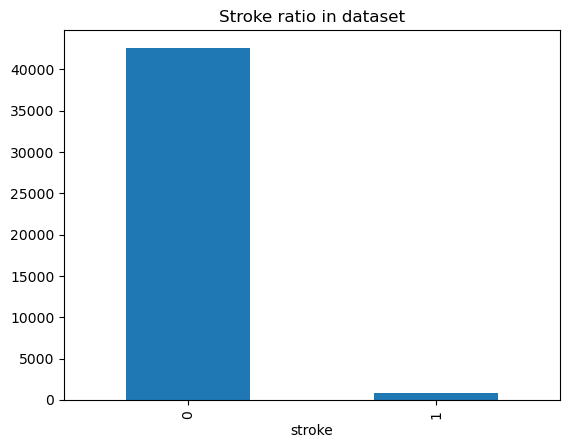

In [13]:
plt.title('Stroke ratio in dataset')
df.stroke.value_counts().plot(kind='bar')


In [14]:
# Gender distribution
df.gender.value_counts()

gender
Female    25665
Male      17724
Other        11
Name: count, dtype: int64

<Axes: title={'center': 'Gender distribution'}, xlabel='gender'>

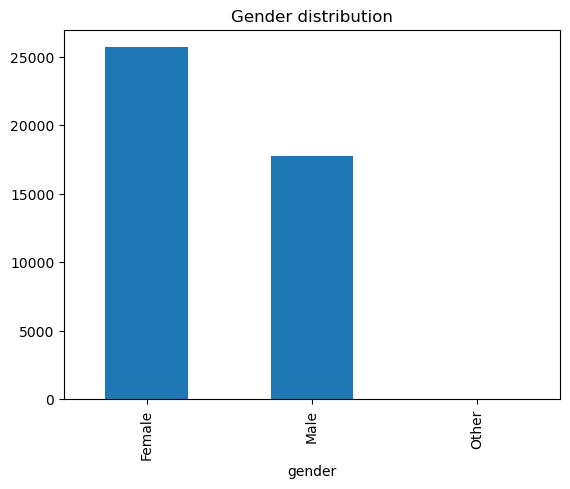

In [15]:
plt.title('Gender distribution')
df.gender.value_counts().plot(kind='bar')


In [16]:
# 'hypertension' distribution
df.hypertension.value_counts()

hypertension
0    39339
1     4061
Name: count, dtype: int64

<Axes: title={'center': 'Hypertention distribution in patients'}, xlabel='hypertension'>

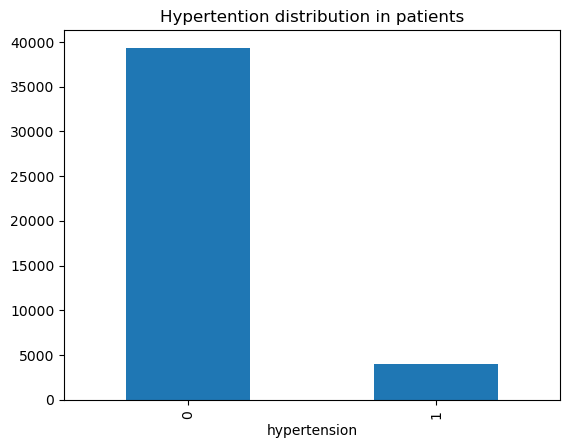

In [17]:
plt.title('Hypertention distribution in patients')
df.hypertension.value_counts().plot(kind='bar')


In [18]:
# heart_disease distribution
df.gender.value_counts()

gender
Female    25665
Male      17724
Other        11
Name: count, dtype: int64

<Axes: title={'center': 'Heart disease distribution in patients'}, xlabel='heart_disease'>

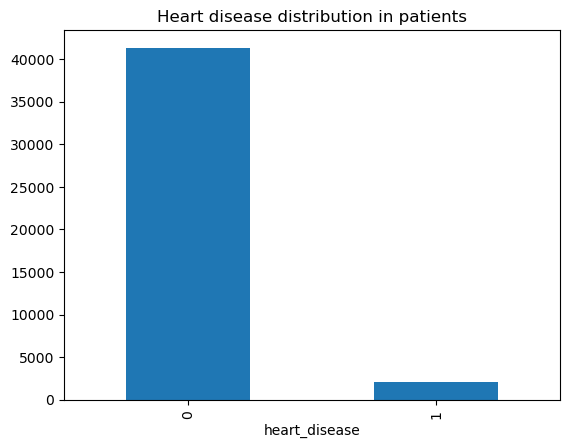

In [19]:
plt.title('Heart disease distribution in patients')
df.heart_disease.value_counts().plot(kind='bar')


In [20]:
df.heart_disease.value_counts()

heart_disease
0    41338
1     2062
Name: count, dtype: int64

In [21]:
# Marital status distribution of patients
df.ever_married.value_counts()

ever_married
Yes    27938
No     15462
Name: count, dtype: int64

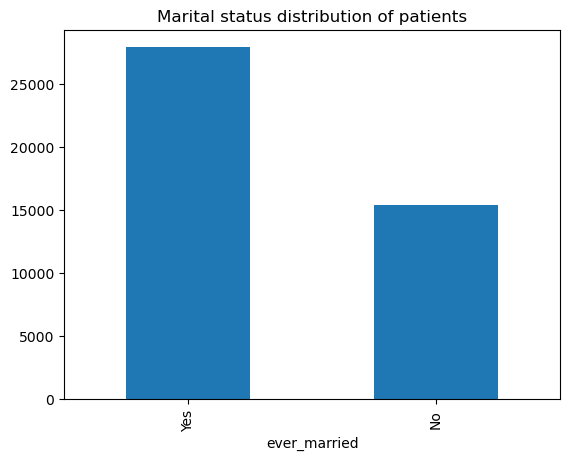

In [22]:
plt.title('Marital status distribution of patients')
df.ever_married.value_counts().plot(kind='bar');



In [23]:
# Patients work type
df.work_type.value_counts()

work_type
Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: count, dtype: int64

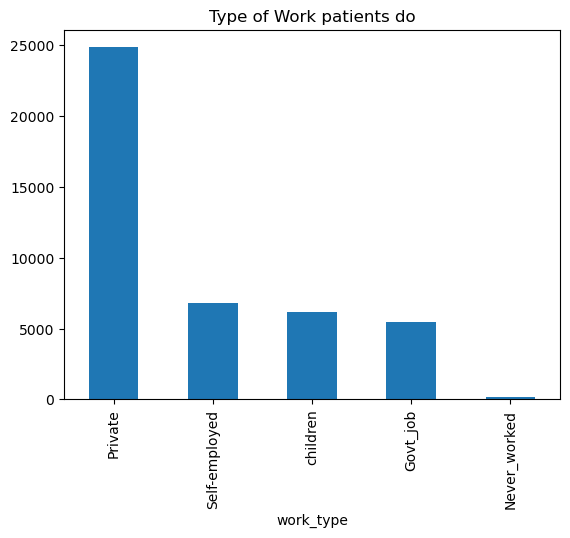

In [24]:
plt.title('Type of Work patients do')
df.work_type.value_counts().plot(kind='bar');


In [25]:
# Residence types of patients
df.Residence_type.value_counts()

Residence_type
Urban    21756
Rural    21644
Name: count, dtype: int64

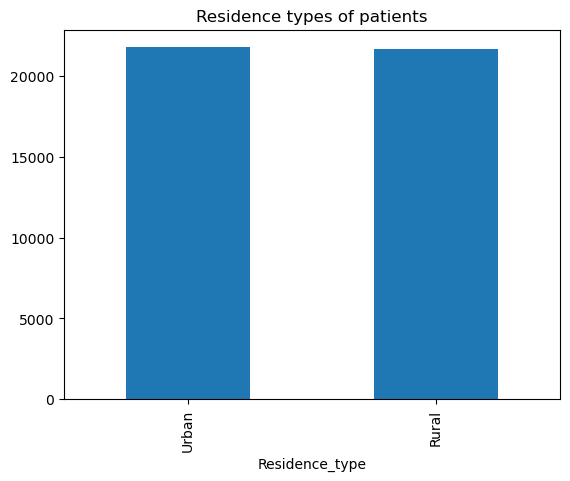

In [26]:
plt.title('Residence types of patients')
df.Residence_type.value_counts().plot(kind='bar');


In [27]:
# Patients smoking status
df.smoking_status.value_counts()

smoking_status
never smoked       16053
formerly smoked     7493
smokes              6562
Name: count, dtype: int64

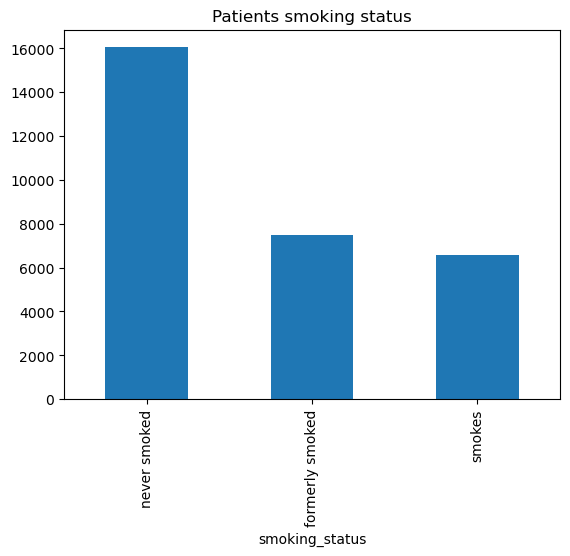

In [28]:
plt.title('Patients smoking status')
df.smoking_status.value_counts().plot(kind='bar');


In [29]:
# Glucose level distribution amongst patients
df.avg_glucose_level.describe()

count    43400.000000
mean       104.482750
std         43.111751
min         55.000000
25%         77.540000
50%         91.580000
75%        112.070000
max        291.050000
Name: avg_glucose_level, dtype: float64

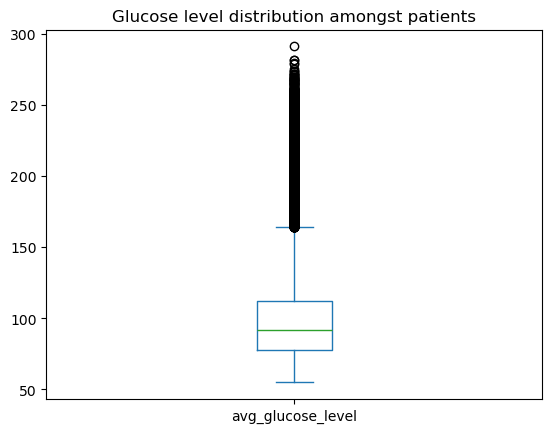

In [30]:
plt.title('Glucose level distribution amongst patients')
df.avg_glucose_level.plot(kind='box');


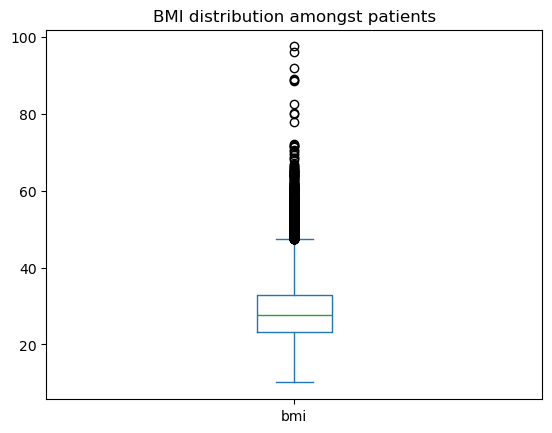

In [31]:
plt.title('BMI distribution amongst patients')
df.bmi.plot(kind='box');

## Bivariate analysis

* Gender based distributions of each feature

In [32]:
df.groupby('stroke')['gender'].value_counts(dropna=False);

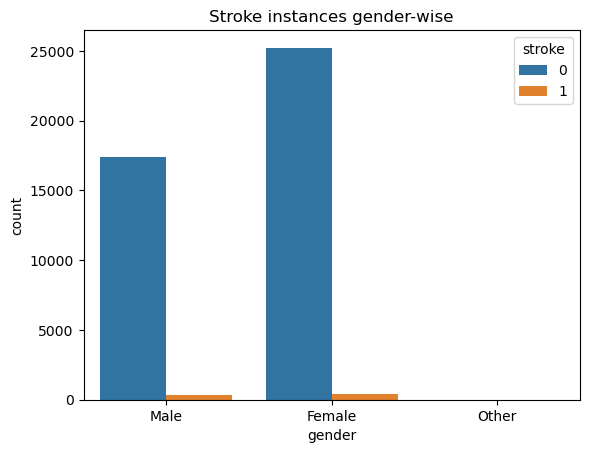

In [33]:
# Plot instances gender wise
p = sns.countplot(data=df, x='gender', hue=df['stroke'].apply(lambda x: str(x)))
p.set_title('Stroke instances gender-wise')
plt.show();

In [34]:
# Stroke and age relationship
print("Minimum age and stroke status\n", df.groupby('stroke')['age'].min())
print("Max age and stroke status\n", df.groupby('stroke')['age'].max())
print("Mean age and stroke status\n", df.groupby('stroke')['age'].mean())
print("Median age and stroke status\n", df.groupby('stroke')['age'].median())

Minimum age and stroke status
 stroke
0    0.08
1    1.32
Name: age, dtype: float64
Max age and stroke status
 stroke
0    82.0
1    82.0
Name: age, dtype: float64
Mean age and stroke status
 stroke
0    41.741565
1    68.143448
Name: age, dtype: float64
Median age and stroke status
 stroke
0    43.0
1    71.0
Name: age, dtype: float64


In [35]:
print(df['stroke'].dtype)

int64


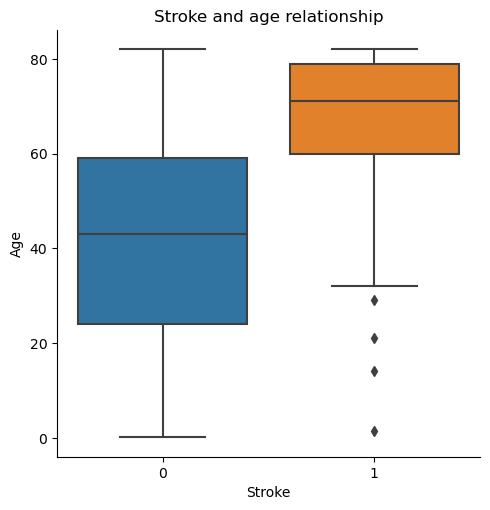

In [36]:
# Plot of stroke and age relationship
p = sns.catplot(data=df, x='stroke', y='age', kind='box')
p.set(title='Stroke and age relationship', xlabel='Stroke', ylabel='Age')
plt.show();

In [37]:
df.groupby('stroke')['hypertension'].value_counts(dropna=False);

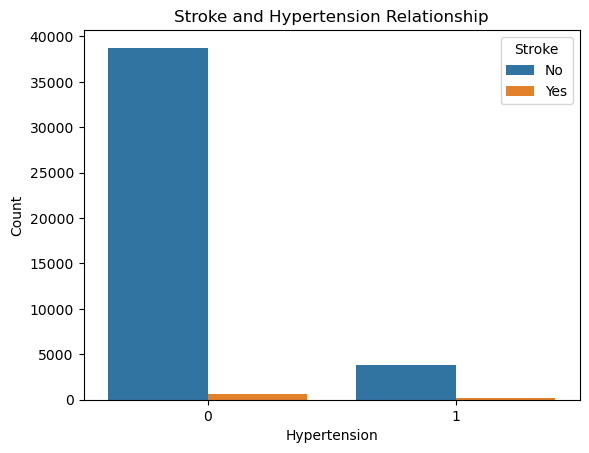

In [38]:
# Plot of stroke and hypertension relationship
p = sns.countplot(data=df, x='hypertension', hue=df['stroke'].apply(lambda x: 'Yes' if x else 'No'))
p.set(title='Stroke and Hypertension Relationship', xlabel='Hypertension', ylabel='Count')
plt.legend(title='Stroke')
plt.show();

In [39]:
df.groupby('stroke')['heart_disease'].value_counts(dropna=False);

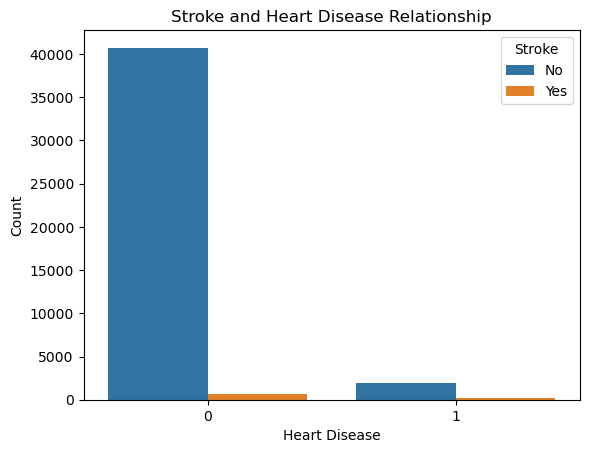

In [40]:
# Plot of stroke and heart disease relationship
p = sns.countplot(df, x='heart_disease', hue=df['stroke'].apply(lambda x: 'Yes' if x else 'No'))
p.set(title='Stroke and Heart Disease Relationship', xlabel='Heart Disease', ylabel='Count')
plt.legend(title='Stroke')
plt.show();


In [41]:
df.groupby('stroke')['ever_married'].value_counts(dropna=False)

stroke  ever_married
0       Yes             27235
        No              15382
1       Yes               703
        No                 80
Name: count, dtype: int64

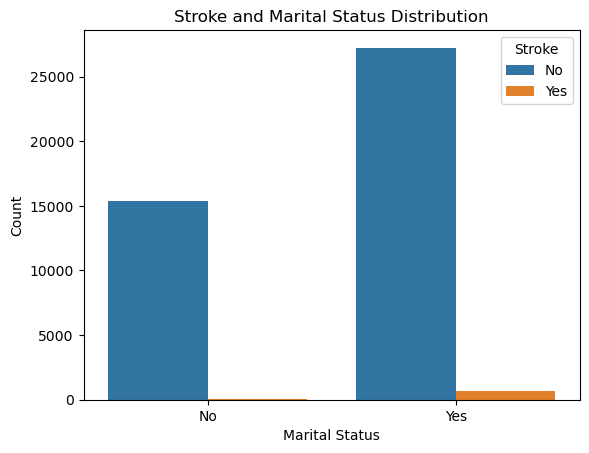

In [42]:
# Plot of stroke and marital status distribution
p = sns.countplot(data=df, x='ever_married', hue=df['stroke'].apply(lambda x: 'Yes' if x else 'No'))
p.set(title='Stroke and Marital Status Distribution', xlabel='Marital Status', ylabel='Count')
plt.legend(title='Stroke')
plt.show();


In [43]:
df.groupby('stroke')['work_type'].value_counts(dropna=False)

stroke  work_type    
0       Private          24393
        Self-employed     6542
        children          6154
        Govt_job          5351
        Never_worked       177
1       Private            441
        Self-employed      251
        Govt_job            89
        children             2
Name: count, dtype: int64

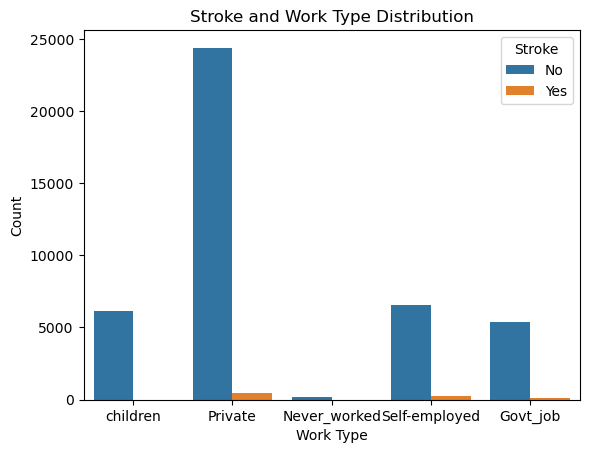

In [44]:
# Plot of stroke and work type distribution
p = sns.countplot(data=df, x='work_type', hue=df['stroke'].apply(lambda x: 'Yes' if x else 'No'))
p.set(title='Stroke and Work Type Distribution', xlabel='Work Type', ylabel='Count')
plt.legend(title='Stroke')
plt.show();


In [45]:
df.groupby('stroke')['Residence_type'].value_counts(dropna=False)

stroke  Residence_type
0       Urban             21357
        Rural             21260
1       Urban               399
        Rural               384
Name: count, dtype: int64

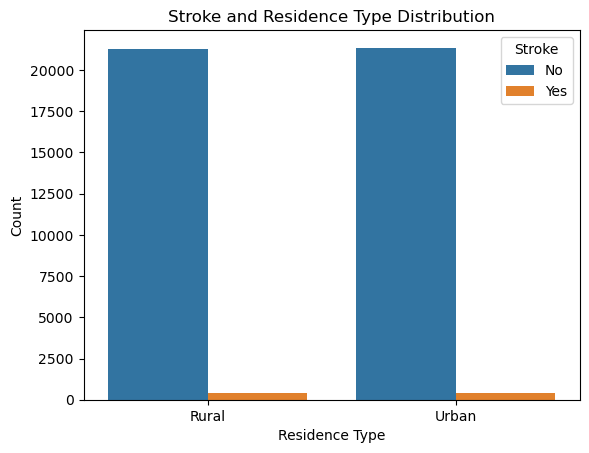

In [46]:
# Plot of stroke and residence type distribution
p = sns.countplot(data=df, x='Residence_type', hue=df['stroke'].apply(lambda x: 'Yes' if x else 'No'))
p.set(title='Stroke and Residence Type Distribution', xlabel='Residence Type', ylabel='Count')
plt.legend(title='Stroke')
plt.show();


In [47]:
# Stroke and bmi relationship
print("Minimum avg glucose and stroke status\n", df.groupby('stroke')['avg_glucose_level'].min())
print("Max avg glucose and stroke status\n", df.groupby('stroke')['avg_glucose_level'].max())
print("Mean avg glucose and stroke status\n", df.groupby('stroke')['avg_glucose_level'].mean())
print("Median avg glucose and stroke status\n", df.groupby('stroke')['avg_glucose_level'].median())

Minimum avg glucose and stroke status
 stroke
0    55.00
1    55.01
Name: avg_glucose_level, dtype: float64
Max avg glucose and stroke status
 stroke
0    291.05
1    271.74
Name: avg_glucose_level, dtype: float64
Mean avg glucose and stroke status
 stroke
0    104.021590
1    129.582669
Name: avg_glucose_level, dtype: float64
Median avg glucose and stroke status
 stroke
0     91.47
1    104.47
Name: avg_glucose_level, dtype: float64


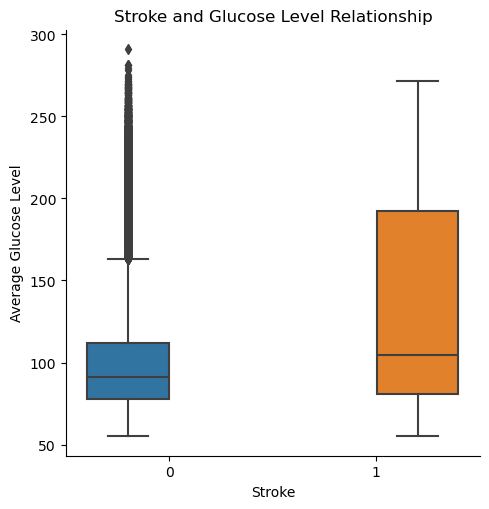

In [48]:
# Plot of stroke and glucose level relationship
p = sns.catplot(data=df, x='stroke', y='avg_glucose_level', hue='stroke', kind='box')
p.set(title='Stroke and Glucose Level Relationship', xlabel='Stroke', ylabel='Average Glucose Level')
plt.show()


In [49]:
# Stroke and bmi relationship
print("Minimum bmi and stroke status\n", df.groupby('stroke')['bmi'].min())
print("Max bmi and stroke status\n", df.groupby('stroke')['bmi'].max())
print("Mean bmi and stroke status\n", df.groupby('stroke')['bmi'].mean())
print("Median bmi and stroke status\n", df.groupby('stroke')['bmi'].median())

Minimum bmi and stroke status
 stroke
0    10.1
1    14.3
Name: bmi, dtype: float64
Max bmi and stroke status
 stroke
0    97.6
1    56.6
Name: bmi, dtype: float64
Mean bmi and stroke status
 stroke
0    28.585371
1    29.868118
Name: bmi, dtype: float64
Median bmi and stroke status
 stroke
0    27.7
1    29.1
Name: bmi, dtype: float64


In [50]:
df.groupby('stroke')['smoking_status'].value_counts(dropna=False)

stroke  smoking_status 
0       never smoked       15769
        NaN                13147
        formerly smoked     7272
        smokes              6429
1       never smoked         284
        formerly smoked      221
        NaN                  145
        smokes               133
Name: count, dtype: int64

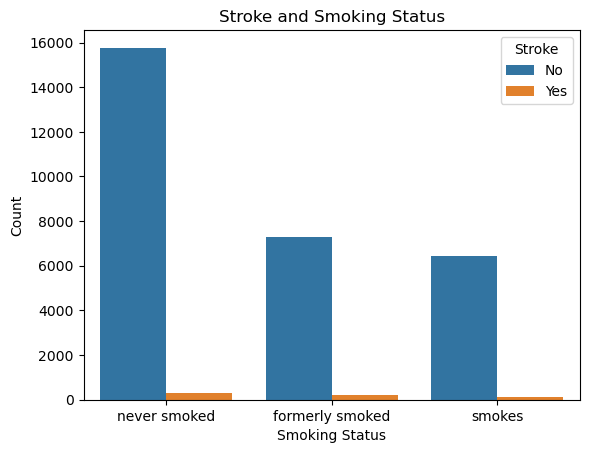

In [51]:
# Plot of stroke and smoking status
p = sns.countplot(data=df, x='smoking_status', hue=df['stroke'].apply(lambda x: 'Yes' if x else 'No'))
p.set(title='Stroke and Smoking Status', xlabel='Smoking Status', ylabel='Count')
plt.legend(title='Stroke')
plt.show()

# Multivariate analysis


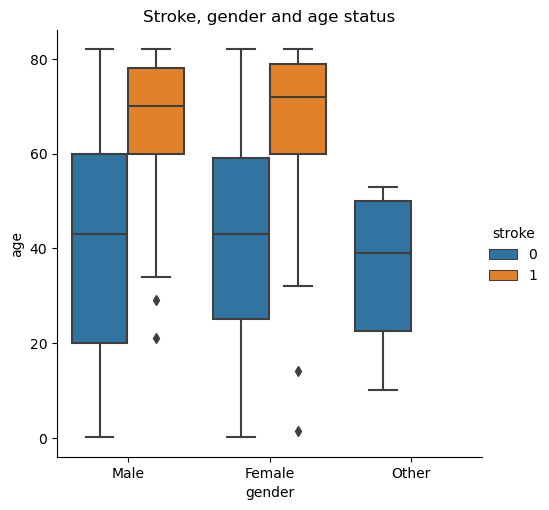

In [52]:
# Plot of stroke, gender and age relationship
p=(sns.catplot(df, x='gender', y='age', hue='stroke', kind='box').set(title='Stroke, gender and age status'));

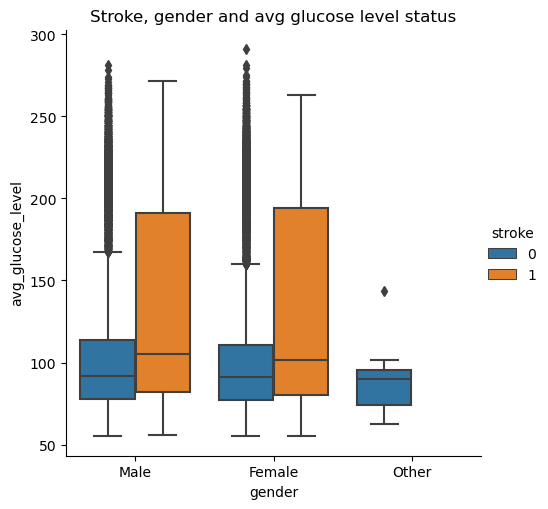

In [53]:
# Plot of stroke, gender and average glucose level relationship
p=(sns.catplot(df, x='gender', y='avg_glucose_level', hue='stroke', kind='box').set(title='Stroke, gender and avg glucose level status'));

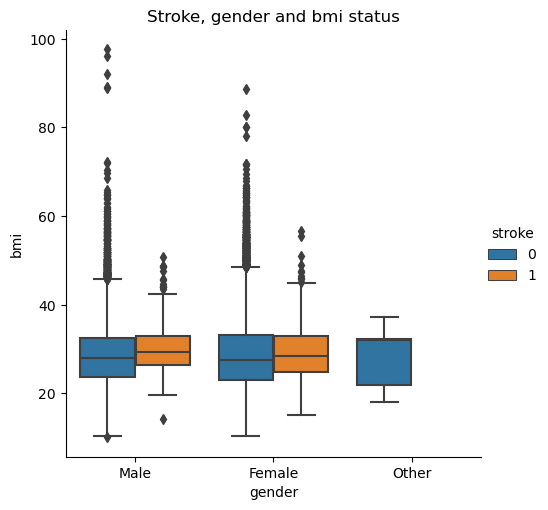

In [54]:
# Plot of stroke, gender and bmi relationship
p=(sns.catplot(df, x='gender', y='bmi', hue='stroke', kind='box').set(title='Stroke, gender and bmi status'));

In [55]:
df.groupby(['stroke','gender','hypertension'])['hypertension'].count()

stroke  gender  hypertension
0       Female  0               23097
                1                2137
        Male    0               15648
                1                1724
        Other   0                  11
1       Female  0                 315
                1                 116
        Male    0                 268
                1                  84
Name: hypertension, dtype: int64

No stroke


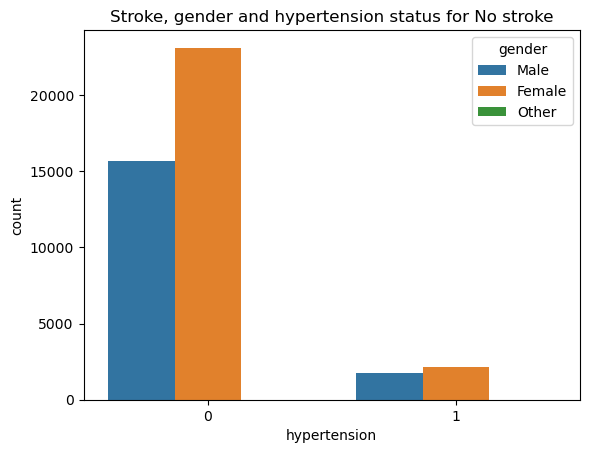

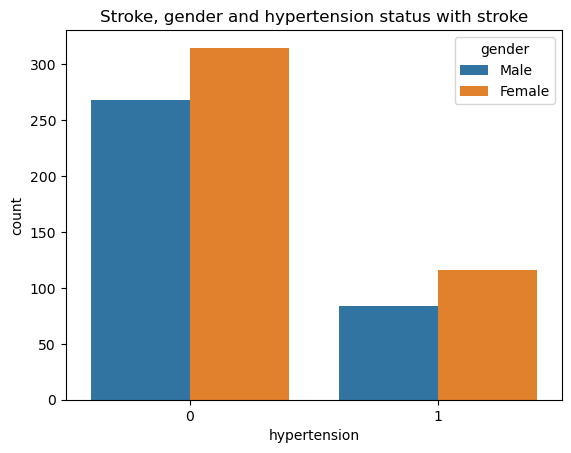

In [56]:
# Plot of stroke, gender and hypertension relationship
for i in df.stroke.unique():
     if i==0:
         print('No stroke')
         sns.countplot(df[df.stroke==i], x='hypertension', hue='gender').set(title='Stroke, gender and hypertension status for No stroke')
         plt.show()
     else:
         sns.countplot(df[df.stroke==i], x='hypertension', hue='gender').set(title='Stroke, gender and hypertension status with stroke')
         plt.show()

In [57]:
df.groupby(['stroke','gender','heart_disease'])['heart_disease'].count()

stroke  gender  heart_disease
0       Female  0                24465
                1                  769
        Male    0                16256
                1                 1116
        Other   0                   11
1       Female  0                  354
                1                   77
        Male    0                  252
                1                  100
Name: heart_disease, dtype: int64

No stroke


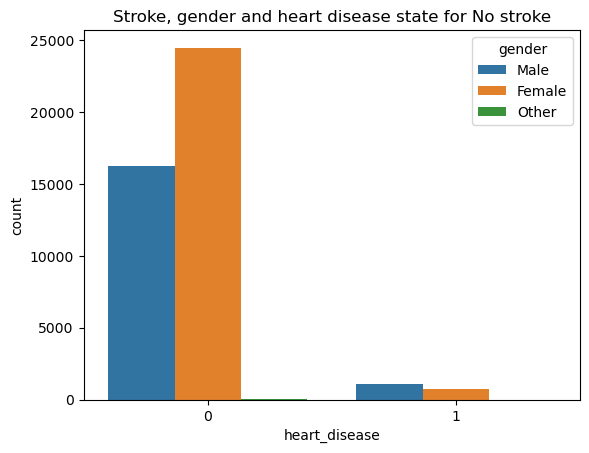

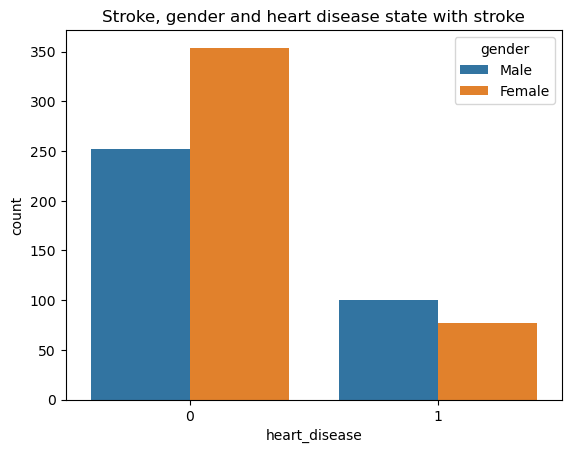

In [58]:
# Plot of stroke, gender and heart disease relationship
for i in df.stroke.unique():
     if i==0:
         print('No stroke')
         sns.countplot(df[df.stroke==i], x='heart_disease', hue='gender').set(title='Stroke, gender and heart disease state for No stroke')
         plt.show()
     else:
         sns.countplot(df[df.stroke==i], x='heart_disease', hue='gender').set(title='Stroke, gender and heart disease state with stroke')
         plt.show()

In [59]:
df.groupby(['stroke','gender','ever_married'])['ever_married'].count()

stroke  gender  ever_married
0       Female  No               8778
                Yes             16456
        Male    No               6598
                Yes             10774
        Other   No                  6
                Yes                 5
1       Female  No                 47
                Yes               384
        Male    No                 33
                Yes               319
Name: ever_married, dtype: int64

No stroke


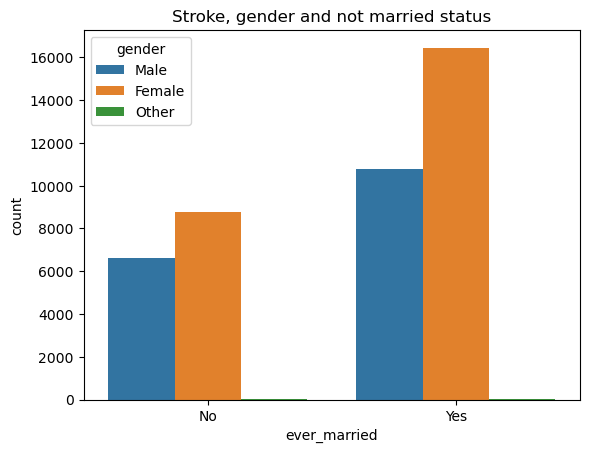

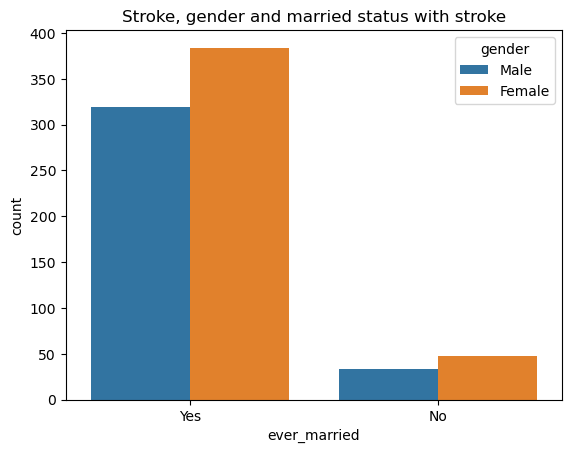

In [60]:
# Plot of stroke, gender and marital status relationship
for i in df.stroke.unique():
     if i==0:
         print('No stroke')
         sns.countplot(df[df.stroke==i], x='ever_married', hue='gender').set(title='Stroke, gender and not married status')
         plt.show()
     else:
         sns.countplot(df[df.stroke==i], x='ever_married', hue='gender').set(title='Stroke, gender and married status with stroke')
         plt.show()

In [61]:
df.groupby(['stroke','gender','smoking_status'])['smoking_status'].count()

stroke  gender  smoking_status 
0       Female  formerly smoked     4019
                never smoked       10371
                smokes              3616
        Male    formerly smoked     3247
                never smoked        5396
                smokes              2812
        Other   formerly smoked        6
                never smoked           2
                smokes                 1
1       Female  formerly smoked       98
                never smoked         197
                smokes                65
        Male    formerly smoked      123
                never smoked          87
                smokes                68
Name: smoking_status, dtype: int64

No stroke


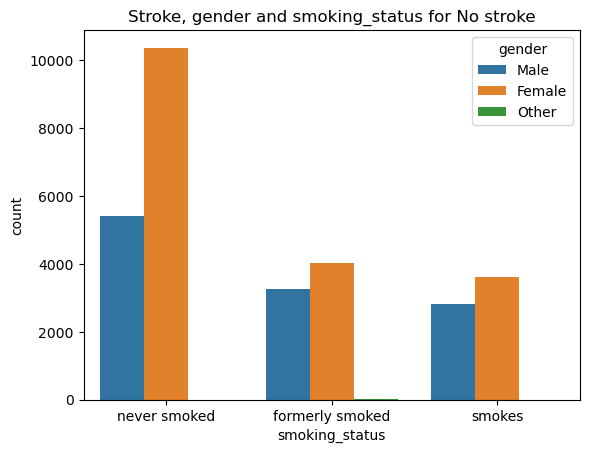

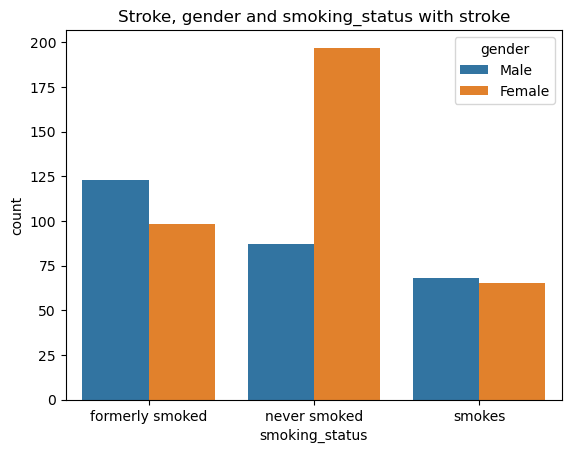

In [62]:
# Plot of stroke, gender and heart disease relationship
for i in df.stroke.unique():
     if i==0:
         print('No stroke')
         sns.countplot(df[df.stroke==i], x='smoking_status', hue='gender').set(title='Stroke, gender and smoking_status for No stroke')
         plt.show()
     else:
         sns.countplot(df[df.stroke==i], x='smoking_status', hue='gender').set(title='Stroke, gender and smoking_status with stroke')
         plt.show()

In [63]:
df.groupby(['stroke','gender','work_type'])['work_type'].count()

stroke  gender  work_type    
0       Female  Govt_job          3254
                Never_worked       101
                Private          15002
                Self-employed     3902
                children          2975
        Male    Govt_job          2095
                Never_worked        76
                Private           9384
                Self-employed     2640
                children          3177
        Other   Govt_job             2
                Private              7
                children             2
1       Female  Govt_job            58
                Private            233
                Self-employed      138
                children             2
        Male    Govt_job            31
                Private            208
                Self-employed      113
Name: work_type, dtype: int64

No stroke


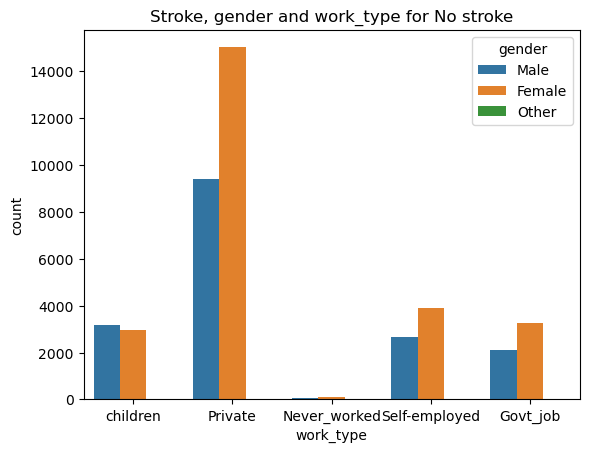

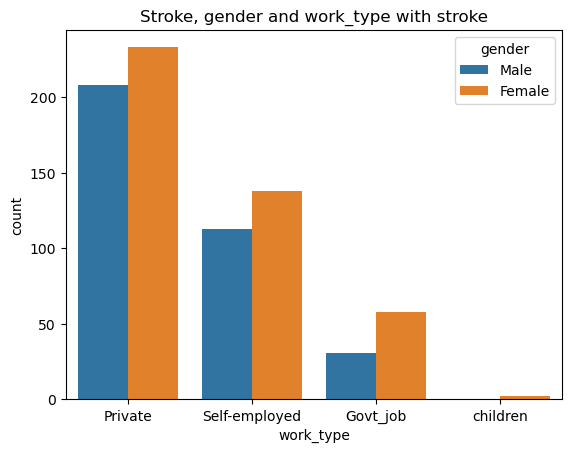

In [64]:
# Plot of stroke, gender and work_type relationship
for i in df.stroke.unique():
     if i==0:
         print('No stroke')
         sns.countplot(df[df.stroke==i], x='work_type', hue='gender').set(title='Stroke, gender and work_type for No stroke')
         plt.show()
     else:
         sns.countplot(df[df.stroke==i], x='work_type', hue='gender').set(title='Stroke, gender and work_type with stroke')
         plt.show()

In [65]:
df.groupby(['stroke','gender','Residence_type'])['Residence_type'].count()

stroke  gender  Residence_type
0       Female  Rural             12605
                Urban             12629
        Male    Rural              8649
                Urban              8723
        Other   Rural                 6
                Urban                 5
1       Female  Rural               211
                Urban               220
        Male    Rural               173
                Urban               179
Name: Residence_type, dtype: int64

No stroke


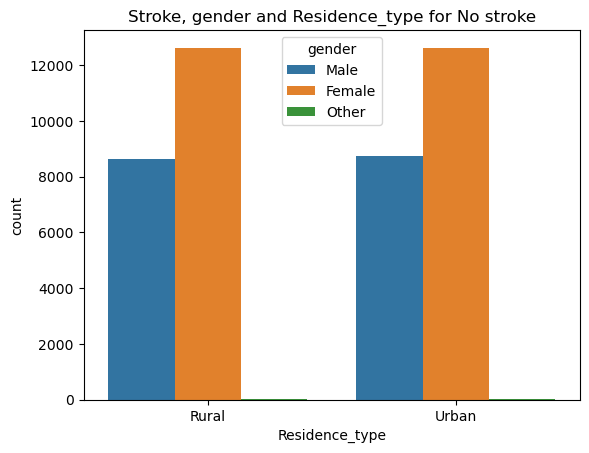

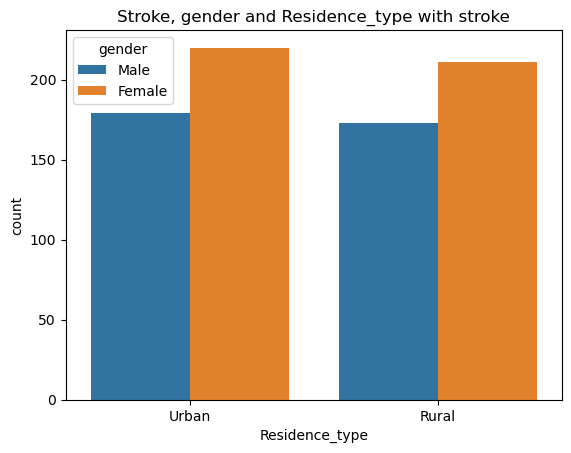

In [66]:
# Plot of stroke, gender and Residence_type relationship
for i in df.stroke.unique():
     if i==0:
         print('No stroke')
         sns.countplot(df[df.stroke==i], x='Residence_type', hue='gender').set(title='Stroke, gender and Residence_type for No stroke')
         plt.show()
     else:
         sns.countplot(df[df.stroke==i], x='Residence_type', hue='gender').set(title='Stroke, gender and Residence_type with stroke')
         plt.show()

In [67]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# Imputations and cleanups

# Numerical value cleanup

In [68]:
df.avg_glucose_level.describe()

count    43400.000000
mean       104.482750
std         43.111751
min         55.000000
25%         77.540000
50%         91.580000
75%        112.070000
max        291.050000
Name: avg_glucose_level, dtype: float64

In [69]:
(111.480000-77.370000)*1.5 + 111.480000

162.645

In [32]:
# Glucose levels in box plot have lot of outliers Q3 + 1.5 *IQR value
print(" outliers glucose levels:", df[df.avg_glucose_level > 213]['avg_glucose_level'].count())

index_glucose= df[df.avg_glucose_level > 162.645]['avg_glucose_level'].index

# Imputing with top value 213
df.loc[index_glucose, 'avg_glucose_level']= 162.645

print(" after imputation, outliers glucose levels:", df[df.avg_glucose_level > 162.645]['avg_glucose_level'].count())

 outliers glucose levels: 2079
 after imputation, outliers glucose levels: 0


<Axes: title={'center': 'Avg Glucose level distribution after imputations'}>

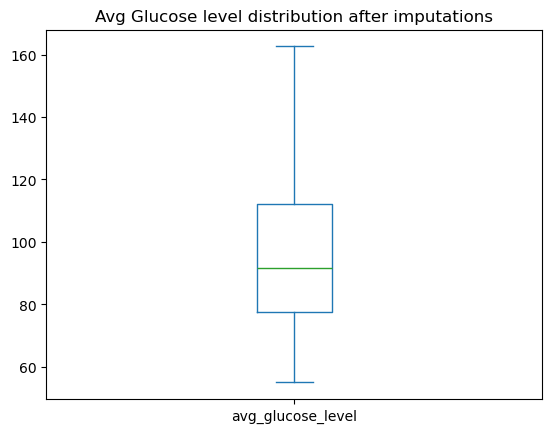

In [33]:
plt.title('Avg Glucose level distribution after imputations')
df.avg_glucose_level.plot(kind='box')

In [72]:
df.bmi.describe()

count    41938.000000
mean        28.605038
std          7.770020
min         10.100000
25%         23.200000
50%         27.700000
75%         32.900000
max         97.600000
Name: bmi, dtype: float64

In [73]:
(32.900000-23.200000)*1.5 + 32.900000

47.449999999999996

In [34]:
# bmi in box plot have lot of outliers Q3 + 1.5 IQR value
print(" outliers bmi:", df[df.bmi > 50]['bmi'].count())

index_bmi= df[df.bmi > 47.44]['bmi'].index

# Imputing with top value 47.44
df.loc[index_bmi, 'bmi']= 47.44

print(" after imputation, outliers bmi:", df[df.bmi > 47.44]['bmi'].count())

 outliers bmi: 576
 after imputation, outliers bmi: 0


<Axes: title={'center': ' BMI distribution after imputations'}>

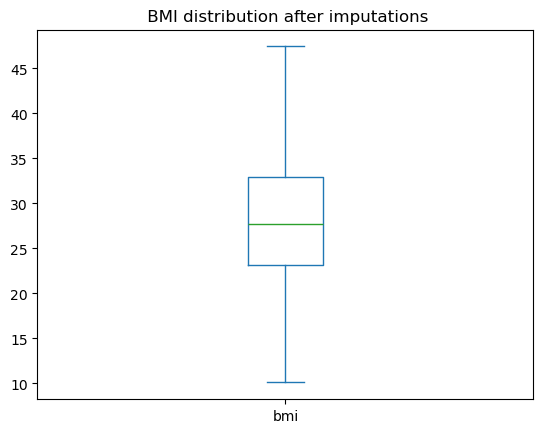

In [35]:
plt.title(' BMI distribution after imputations')
df.bmi.plot(kind='box')


In [76]:
df.groupby('gender')['smoking_status'].value_counts()

gender  smoking_status 
Female  never smoked       10568
        formerly smoked     4117
        smokes              3681
Male    never smoked        5483
        formerly smoked     3370
        smokes              2880
Other   formerly smoked        6
        never smoked           2
        smokes                 1
Name: count, dtype: int64

## Feature engineering

In [77]:
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0


In [78]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [36]:
''' Function for categorical conversion
    Takes dataframe and feature list as inputs
    returns updated dataframe with original feature dropped'''

def cat_encoder(df, cat_feature_list):
    for col in cat_feature_list:
        if col in df.columns:
            transformed_feature=pd.get_dummies(df[col], prefix=col, drop_first=True)
            df=df.drop(col,axis=1)
            df=pd.concat([df,transformed_feature],axis=1)
    return df

In [37]:
# Encoding
df= cat_encoder(df, ['gender', 'ever_married', 'work_type', 'Residence_type'])

In [38]:
df.head(3)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban
0,30669,3.0,0,0,95.12,18.0,NaN,0,True,False,False,False,False,False,True,False
1,30468,58.0,1,0,87.96,39.2,never smoked,0,True,False,True,False,True,False,False,True
2,16523,8.0,0,0,110.89,17.6,NaN,0,False,False,False,False,True,False,False,True


## Option 1: KNN based imputations for smoking_status and bmi

In [39]:
df.smoking_status.value_counts(dropna=False)

smoking_status
never smoked       16053
NaN                13292
formerly smoked     7493
smokes              6562
Name: count, dtype: int64

In [40]:
### Custom encoding - before doing KNNImputer as it expects numerical value.
df.smoking_status=df.smoking_status.map({'never smoked':0, 'formerly smoked':1, 'smokes':2})

In [41]:
df.smoking_status.value_counts(dropna=False)

smoking_status
0.0    16053
NaN    13292
1.0     7493
2.0     6562
Name: count, dtype: int64

In [42]:
df.bmi.isna().value_counts(dropna=False)

bmi
False    41938
True      1462
Name: count, dtype: int64

In [43]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5, weights='distance', metric='nan_euclidean')

In [44]:
df_imputed=knn_imputer.fit_transform(df)

In [45]:
df_imputed=pd.DataFrame(df_imputed, columns=['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke', 'gender_Male', 'gender_Other',
       'ever_married_Yes', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'Residence_type_Urban'])

### Smoking_status imputations

In [89]:
df_imputed.isna().any()

id                         False
age                        False
hypertension               False
heart_disease              False
avg_glucose_level          False
bmi                        False
smoking_status             False
stroke                     False
gender_Male                False
gender_Other               False
ever_married_Yes           False
work_type_Never_worked     False
work_type_Private          False
work_type_Self-employed    False
work_type_children         False
Residence_type_Urban       False
dtype: bool

In [46]:
df_imputed.smoking_status=df_imputed.smoking_status.map(np.round)

In [47]:
df_imputed.smoking_status.value_counts(dropna=False)

smoking_status
0.0    21156
1.0    15447
2.0     6797
Name: count, dtype: int64

In [48]:
# Adding imputed column to original dataframe
df['smoking_status_imputed']=df_imputed.smoking_status

Missing bmi imputations status

In [93]:
df_imputed.bmi.isna().value_counts(dropna=False)

bmi
False    43400
Name: count, dtype: int64

In [49]:
# Adding imputed column to original dataframe
df['bmi_imputed']=df_imputed.bmi

In [95]:
df.isna().any()

id                         False
age                        False
hypertension               False
heart_disease              False
avg_glucose_level          False
bmi                         True
smoking_status              True
stroke                     False
gender_Male                False
gender_Other               False
ever_married_Yes           False
work_type_Never_worked     False
work_type_Private          False
work_type_Self-employed    False
work_type_children         False
Residence_type_Urban       False
smoking_status_imputed     False
bmi_imputed                False
dtype: bool

In [50]:
df = df.drop(['bmi','smoking_status','id'], axis=1)

### After KNN based imputation 1405 rows have missing values.

In [51]:
df.shape

(43400, 15)

## MinMax scaling for numericals

In [79]:
bmi_scaler=MinMaxScaler()
df.bmi_imputed=bmi_scaler.fit_transform(df['bmi_imputed'].array.reshape(-1,1))

glucose_scaler=MinMaxScaler()
df['avg_glucose_level']=glucose_scaler.fit_transform(df['avg_glucose_level'].array.reshape(-1,1))


age_scaler=MinMaxScaler()
df['age']=age_scaler.fit_transform(df['age'].array.reshape(-1,1))

In [78]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,stroke,smoking_status_imputed,bmi_imputed
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,0.514379,0.093571,0.047512,0.411113,0.018041,0.669147,0.493856
std,0.274898,0.291235,0.212733,0.282950,0.133103,0.731182,0.195284
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.291992,0.000000,0.000000,0.209392,0.000000,0.000000,0.356186
50%,0.536133,0.000000,0.000000,0.339821,0.000000,1.000000,0.476701
75%,0.731445,0.000000,0.000000,0.530169,0.000000,1.000000,0.610605
max,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000


In [99]:
# smoking_scaler=MinMaxScaler()
# df['smoking_status_imputed']=smoking_scaler.fit_transform(df['smoking_status_imputed'].array.reshape(-1,1))

# Correlation Matrix

In [ ]:
df.info()

In [ ]:
df.head(3)

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Correlation Matrix with Stroke')
sns.heatmap(df.corr(),annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show();

Observations:

Lot of features are correlated. Pairs that should not be together are as follows.



In [ ]:
stroke_correlation = df.corr()['stroke'].drop(['stroke'])
plt.title('Correlation with Stroke')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
sns.barplot(x=stroke_correlation.values, y=stroke_correlation.index, palette='coolwarm')
plt.show();


## Observtations:
* Relationship of dependent variable "Stroke" is relatively weak as per the co-relation matrix.
* The data is highly imbalanced, as positive samples are 643 and negative samples are 41295. To overcome this issue we will use class_weights values in the linear model and use a non-linear models.
* The Correlation coefficient coefficient relationship is highest positive  with age, followed by heart disease, hypertension, average glucose levels, bmi.
* It is negatively correlated with work type. However it's very weak.

In [ ]:
# ! jupyter nbconvert --to html '/content/6040_AlphaGroupProject_Milestone1_final.ipynb'

## Preparation for models

In [52]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'stroke',
       'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_imputed', 'bmi_imputed'],
      dtype='object')

In [80]:
Y=df['stroke']
X=df.drop(['stroke'],axis=1)

### Oversampling the minoryty class '1' in stroke dataset. Since stats model does not provide class weights option

In [81]:
import imblearn
print(imblearn.__version__)

from collections import Counter
from imblearn.over_sampling import RandomOverSampler

0.11.0


In [82]:
# The sampling setting

oversampling = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversampling.fit_resample(X, Y)

In [83]:
print(Counter(y_over))

Counter({0: 42617, 1: 42617})


In [84]:

print("Shapes after oversampling minority class", X_over.shape, y_over.shape)

Shapes after oversampling minority class (85234, 14) (85234,)


In [85]:

print("Class counts after oversampling minority class:\n\n", y_over.value_counts(dropna=False))

Class counts after oversampling minority class:

 stroke
0    42617
1    42617
Name: count, dtype: int64


## Creating test and training datasets

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test= train_test_split(X_over,y_over, stratify=y_over, test_size=0.20, random_state=2 )

In [87]:
print("Model training dataset sizes: ", X_train.shape, Y_train.shape, " Test dataset size:", X_test.shape, Y_test.shape )

Model training dataset sizes:  (68187, 14) (68187,)  Test dataset size: (17047, 14) (17047,)


### Saving the random generated samples

In [ ]:
X_train.to_csv('/content/X_train.csv', header=True, index=True)
X_test.to_csv('/content/X_test.csv', header=True, index=True)
Y_train.to_csv('/content/Y_train.csv', header=True, index=True)
Y_test.to_csv('/content/Y_test.csv' ,header=True, index=True,)

In [ ]:
X_train.isna().any()

In [ ]:
Y_train.value_counts(dropna=False)

In [ ]:
Y_test.value_counts(dropna=False)

### Neural network

In [88]:
# Neural network  training
# Time tracking
from sklearn.neural_network import MLPClassifier

start_time_mlp = datetime.now()

# Setting parameters for grid search
params={'hidden_layer_sizes':[(40,),(40,25),(40,25,10),(40,25,20,10)],
        'activation':['logistic', 'relu','tanh'],
       'learning_rate':['invscaling', 'adaptive'],
       'learning_rate_init': [0.001,0.01,0.1],
        'alpha':[0.1, 0.01, 0.0001]
         }


clf=MLPClassifier(max_iter=1000, solver='sgd', early_stopping=True)

grid=GridSearchCV(clf, param_grid=params, cv=5, verbose=3,  n_jobs=-1)
grid.fit(X_train.values,Y_train.values)

# End time
end_time_mlp = datetime.now()
print('-'*50)
print('Duration: {}'.format(end_time_mlp - start_time_mlp))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
--------------------------------------------------
Duration: 0:27:55.571423


In [89]:
print("The best grid parameters:", grid.best_params_)

The best grid parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (40, 25, 20, 10), 'learning_rate': 'adaptive', 'learning_rate_init': 0.1}


In [90]:
mlp_tuned = grid.best_estimator_
mlp_tuned.fit(X_train,Y_train)

MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(40, 25, 20, 10), learning_rate='adaptive',
              learning_rate_init=0.1, max_iter=1000, solver='sgd')

[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(40,), learning_rate=invscaling, learning_rate_init=0.01;, score=0.712 total time=   1.7s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(40,), learning_rate=invscaling, learning_rate_init=0.1;, score=0.776 total time=   1.0s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(40,), learning_rate=adaptive, learning_rate_init=0.001;, score=0.772 total time=   9.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(40,), learning_rate=adaptive, learning_rate_init=0.1;, score=0.786 total time=   7.4s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(40, 25), learning_rate=invscaling, learning_rate_init=0.01;, score=0.500 total time=   1.4s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(40, 25), learning_rate=invscaling, learning_rate_init=0.1;, score=0.753 total time=   1.8s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(40, 25), le

In [91]:
len(mlp_tuned.feature_names_in_)

14

In [92]:
#
print("The coefs for number of layers, input and hiddden layers:", len(mlp_tuned.coefs_))



The coefs for number of layers, input and hiddden layers: 5


In [93]:
# Coefficients for each layer
print("The coefs for input and first hidden layer", "\nNumber of coefs:", len(mlp_tuned.coefs_[0]))
print("The coefs for hidden layer 1 and hidden layer 2", "\nNumber of coefs:", len(mlp_tuned.coefs_[1]))
print("The coefs for hidden layer 2 and hidden layer 3", "\nNumber of coefs:", len(mlp_tuned.coefs_[2]))
print("The coefs for hidden layer 3 and hidden layer 4", "\nNumber of coefs:", len(mlp_tuned.coefs_[3]))
print("The coefs for hidden layer 3 and hidden layer 5", "\nNumber of coefs:", len(mlp_tuned.coefs_[4]))

The coefs for input and first hidden layer 
Number of coefs: 14
The coefs for hidden layer 1 and hidden layer 2 
Number of coefs: 40
The coefs for hidden layer 2 and hidden layer 3 
Number of coefs: 25
The coefs for hidden layer 3 and hidden layer 4 
Number of coefs: 20
The coefs for hidden layer 3 and hidden layer 5 
Number of coefs: 10


In [94]:
# Extracting coefficients for each layer
print("Input and first hidden Layer coefficients")
# pd.DataFrame(mlp_tuned.coefs_[0])

mlp_tuned.coefs_[0]

Input and first hidden Layer coefficients


array([[ 1.56767448e+00,  3.42724963e+00, -2.71696080e+00,
        -2.55190741e+00,  2.15299384e+00,  4.51016184e+00,
        -1.31223276e+00,  4.82362168e+00, -6.87627155e-01,
        -5.20759272e+00,  5.23662085e-01, -2.75222298e+00,
         3.39906913e-02, -1.04575200e+00,  4.33963895e-01,
        -4.89829839e+00,  2.65583701e+00, -2.15240395e-01,
        -3.91890555e+00, -1.54382403e+00, -1.36148619e+00,
         4.73243345e+00, -8.40571053e-01, -1.19414566e+00,
        -4.36789982e-02,  2.67297324e+00, -4.04952075e+00,
        -2.08122321e+00, -9.45752271e-01, -4.59507026e+00,
         8.57859246e-01, -2.57809525e+00,  2.42078046e+00,
        -1.54066018e+00, -9.29565320e-02, -3.70349106e+00,
        -2.54403297e+00,  1.15484846e+00, -5.21731290e-01,
         3.71499412e+00],
       [ 2.90974045e-01,  1.49474518e+00,  7.46031457e-01,
         2.10279051e+00,  7.52299585e-01,  7.35158229e-01,
         2.55505219e-02,  6.46840135e-01, -1.36625719e+00,
         2.64589509e-01,  9.47

In [95]:
# The weight vector of first percentron is vector of all weights in FC.
print("First neuron H00 weights vector with all neurons of hidden layer", mlp_tuned.coefs_[0][:,0])

First neuron H00 weights vector with all neurons of hidden layer [ 1.56767448  0.29097405 -0.44651855  3.90718456  0.81443461 -0.215654
 -1.11255503  0.21615367  0.14038996 -1.16792577  1.31192402  0.57664801
 -0.11569885  5.29165949]


In [96]:
# Extracting coefficients for first imput feature in input layer
print("first Input neuron coefficient with first hidden layer")
# pd.DataFrame(mlp_tuned.coefs_[0][0][0])
mlp_tuned.coefs_[0][0][0]

first Input neuron coefficient with first hidden layer


1.5676744760887953

In [97]:
# The number of iterations and mapping
print("Number of iterations run by tuned model before stopping:", mlp_tuned.n_iter_)

Number of iterations run by tuned model before stopping: 216


In [98]:
# Best validation score seen before stopping the training,
print("Best validation score before stopping, we kept early_stopping True:", mlp_tuned.best_validation_score_)

Best validation score before stopping, we kept early_stopping True: 0.9678838539375275


In [99]:
print("Output activation:", mlp_tuned.out_activation_)

Output activation: logistic


In [100]:
mlp_tuned.classes_

array([0, 1])

In [101]:
Y_predict_train_mlp=mlp_tuned.predict(X_train)
Y_predict_train_mlp

array([0, 1, 0, ..., 0, 1, 1])

In [102]:
print(classification_report(Y_train.values, Y_predict_train_mlp))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     34093
           1       0.96      1.00      0.98     34094

    accuracy                           0.98     68187
   macro avg       0.98      0.98      0.98     68187
weighted avg       0.98      0.98      0.98     68187



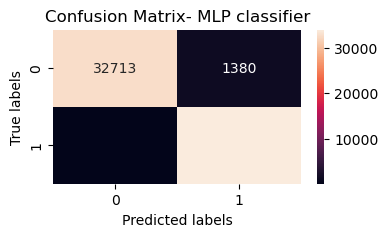

In [103]:
conf_matrix_mlp_train=confusion_matrix(Y_train.values, Y_predict_train_mlp)


plt.figure(figsize=(4,2))
ax= plt.subplot()
sns.heatmap(conf_matrix_mlp_train, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix- MLP classifier');


In [104]:
Y_predict_test_mlp=mlp_tuned.predict(X_test)
Y_predict_test_mlp

array([1, 1, 1, ..., 0, 0, 1])

In [105]:
print(classification_report(Y_test.values, Y_predict_test_mlp))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      8524
           1       0.94      1.00      0.97      8523

    accuracy                           0.97     17047
   macro avg       0.97      0.97      0.97     17047
weighted avg       0.97      0.97      0.97     17047



In [107]:
from joblib import dump

# Assuming `model` is your model object
dump(mlp_tuned, 'mlp_tuned.joblib')


['mlp_tuned.joblib']